In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


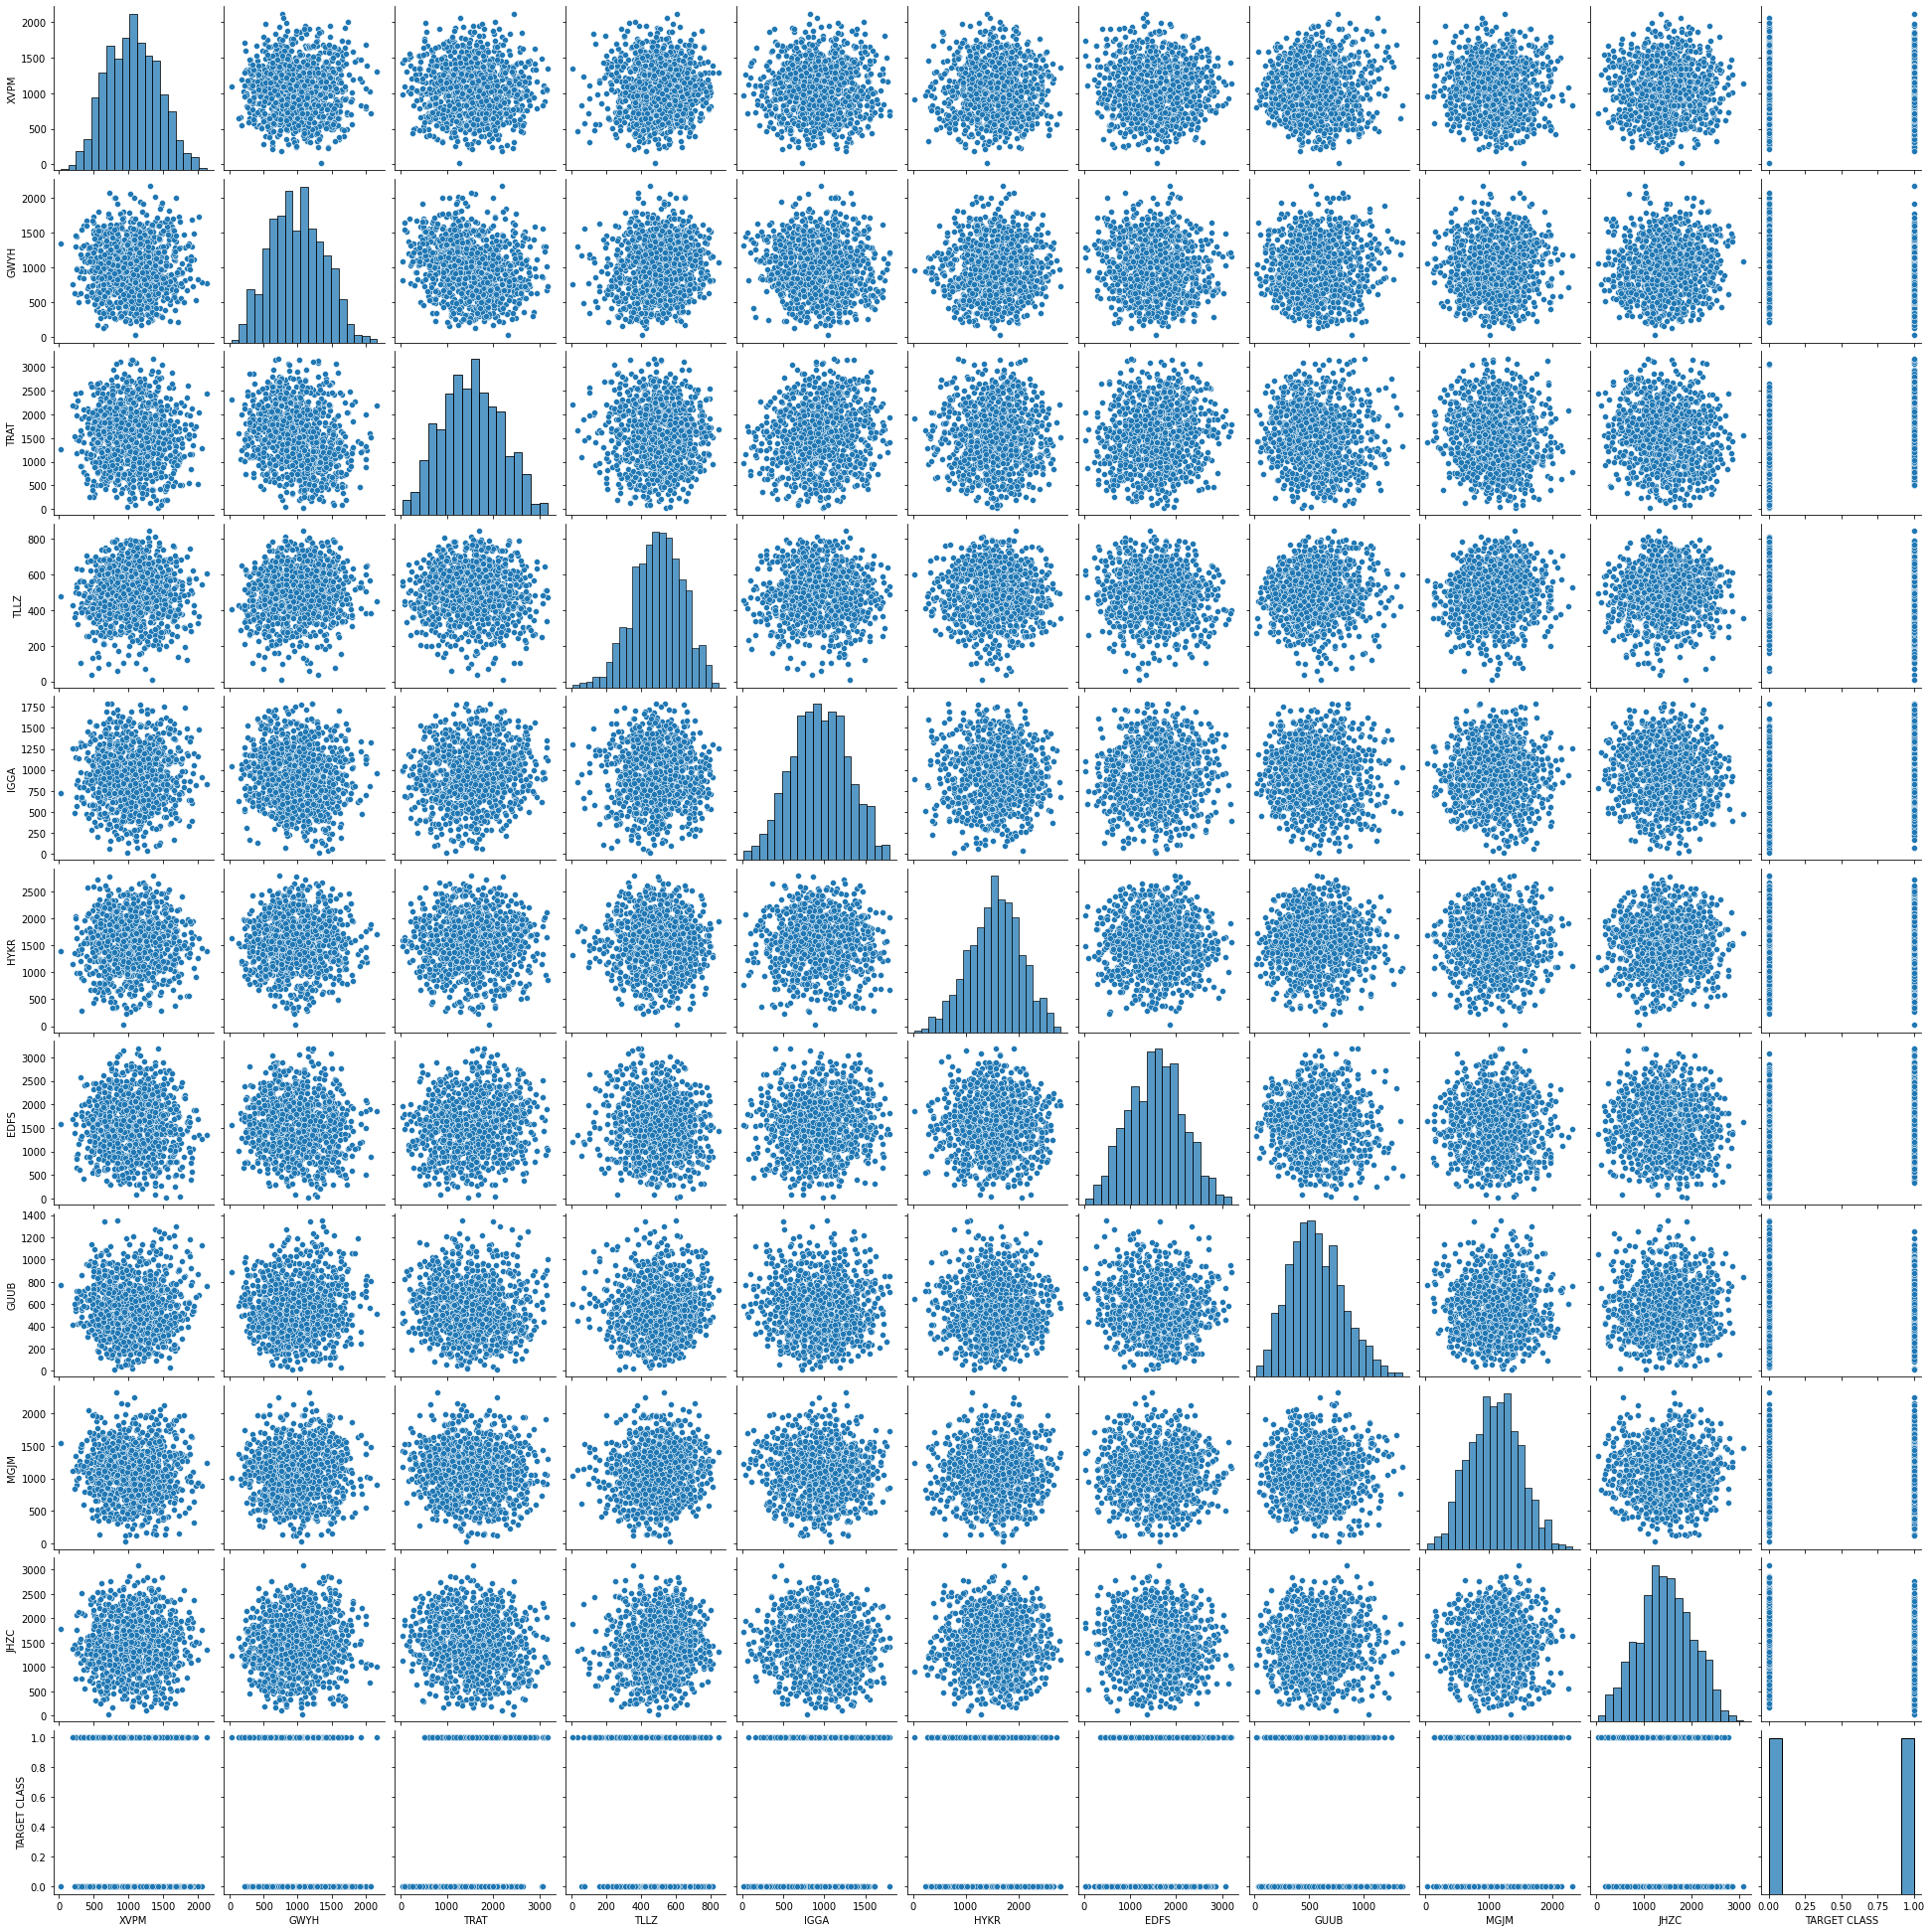

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [11]:
X = df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']]

In [12]:
Y = df['TARGET CLASS']

In [8]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_feature = scaler.transform(X)

In [17]:
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
Y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(Y_test, Y_pred))

[[113  39]
 [ 39 109]]


In [33]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.74      0.74      0.74       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [39]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [35]:
print(error_rate)

[0.26, 0.28, 0.22333333333333333, 0.23333333333333334, 0.21, 0.22, 0.2, 0.21, 0.19333333333333333, 0.19, 0.19333333333333333, 0.18666666666666668, 0.19333333333333333, 0.19, 0.18333333333333332, 0.18, 0.17666666666666667, 0.18, 0.18666666666666668, 0.18333333333333332, 0.18, 0.18333333333333332, 0.18333333333333332, 0.17666666666666667, 0.19, 0.19, 0.19, 0.18333333333333332, 0.18666666666666668, 0.18, 0.18, 0.17333333333333334, 0.18333333333333332, 0.18, 0.18, 0.17333333333333334, 0.18, 0.18333333333333332, 0.19]


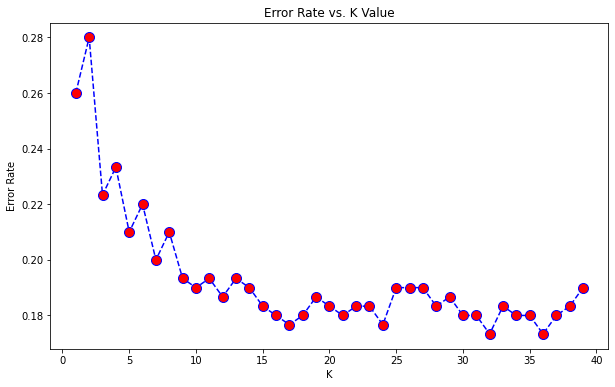

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

print('WITH K = 30')
print('\n')
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


WITH K = 30


[[123  29]
 [ 25 123]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       152
           1       0.81      0.83      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

